In [ ]:
In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

Download Titanic data from Kaggle. The data in the train.csv file meets your need.
Split your data into training and test sets.
Predict the survival based on the test data you split by creating your model.
Is your model's performance satisfactory? Explain.
Try to improve your model's performance by adding or subtracting some variables.
Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_df['Age'].fillna((titanic_df['Age'].mean()), inplace=True)
del titanic_df['Cabin']

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
for x in titanic_df.columns:
    #printing unique values
    print(x ,':', len(titanic_df[x].unique()))

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 89
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Embarked : 4


In [6]:
# one-hot encoding of the Gender
titanic_df['Sex'] = pd.get_dummies(titanic_df.Sex, drop_first=True)

# one-hot encoding of the Passenger Class
titanic_df['Pclass'] = pd.get_dummies(titanic_df.Pclass, drop_first=True)

# one-hot encoding of the Embarked Class
titanic_df['Embarked'] = pd.get_dummies(titanic_df.Embarked, drop_first=True)

In [7]:
titanic_df['fare*parch'] = titanic_df['Fare']*titanic_df['Parch']
titanic_df['embarked*fare'] = titanic_df['Embarked']*titanic_df['Fare']
titanic_df['pclass*sex'] = titanic_df['Pclass']*titanic_df['Sex']
titanic_df['age*fare'] = titanic_df['Age']*titanic_df['Fare']
titanic_df['age*sex'] = titanic_df['Age']*titanic_df['Sex']

titanic_df['sibsp*sex'] = titanic_df['SibSp']*titanic_df['Sex']
titanic_df['sibsp*fare'] = titanic_df['SibSp']*titanic_df['Fare']

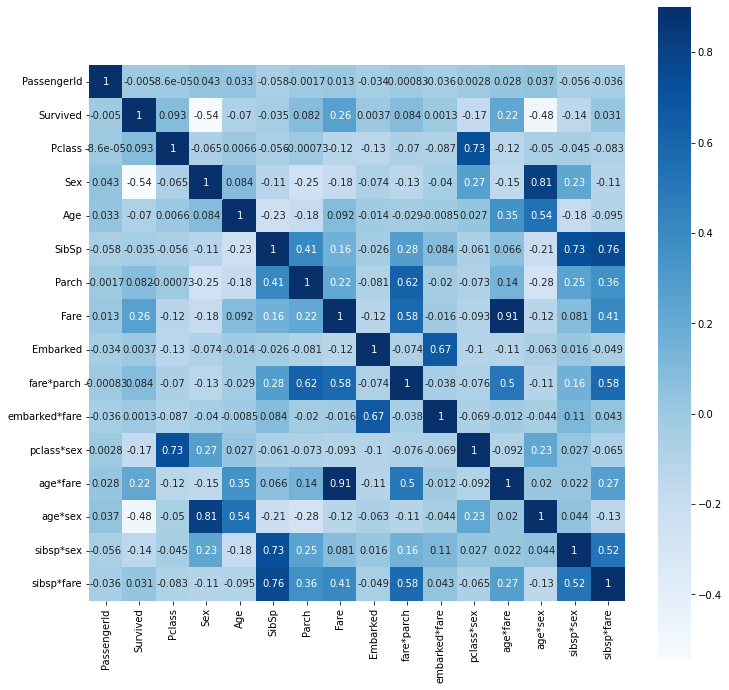

In [8]:
corr = titanic_df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=True)

<Figure size 864x576 with 0 Axes>

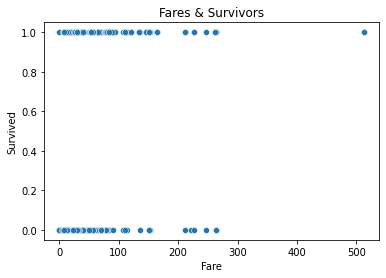

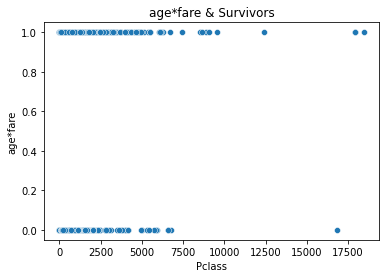

In [9]:
plt.figure(figsize=(12,8))

plt.show(121)
plt.title('Fares & Survivors')
sns.scatterplot(titanic_df['Fare'], titanic_df['Survived'])
plt.ylabel('Survived')
plt.xlabel('Fare')

plt.show(122)
plt.title('age*fare & Survivors')
sns.scatterplot(titanic_df['age*fare'], titanic_df['Survived'])
plt.ylabel('age*fare')
plt.xlabel('Pclass')
plt.show()

In [10]:
Y = titanic_df['Survived']

X = titanic_df[['age*fare', 'Parch', 'Embarked']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [5.87410585e-05 3.19749513e-02 5.41695580e-02]

Intercept: 
 0.3073021777249094


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 712
The number of observations in test set is 179


In [12]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     15.98
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           4.63e-10
Time:                        11:06:19   Log-Likelihood:                -475.93
No. Observations:                 712   AIC:                             959.9
Df Residuals:                     708   BIC:                             978.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3075      0.023     13.454      0.000       0.263       0.352
age*fare     6.21e-05   9.94e-06      6.250      0.000    4.26e-05    8.16e-05
Parch          0.0535      0.024      2.272      0.023       0.007       0.100
Embarked       0.0102      0.064      0.160      0.873      -0.116       0.136
==============================================================================
Omnibus:                     4160.505   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.162
Skew:                           0.469   Prob(JB):                     3.97e-23
Kurtosis:                       1.388   Cond. No.                     7.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

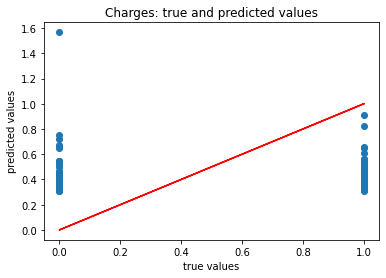

Mean absolute error of the prediction is: 0.4531429218202811
Mean squared error of the prediction is: 0.23164340202603464
Root mean squared error of the prediction is: 0.48129346767438536
Mean absolute percentage error of the prediction is: inf


In [13]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [16]:
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [17]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.64
Accuracy on Test Data  : 0.66


In [18]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)

train_accuracy = log_reg_mnm.score(X_train, y_train)
test_accuracy = log_reg_mnm.score(X_test, y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.64
Accuracy on Test Data  : 0.66


In [19]:
#try to visualize the one-vs-rest & soft-max representations

In [20]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.654,0.687
1,0.010,0.639,0.670
2,0.100,0.643,0.665
3,1.000,0.642,0.659
4,10.000,0.642,0.659
5,100.000,0.642,0.659
6,1000.000,0.642,0.659


#My first model is overfitting.

# New Model

In [30]:
Y = titanic_df['Survived']

X = titanic_df[['age*fare', 'Parch', 'Embarked', 'Fare']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-1.88622862e-05  1.53275069e-02  6.18025050e-02  3.13192177e-03]

Intercept: 
 0.29094274854881813


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 712
The number of observations in test set is 179


In [32]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     13.71
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           8.95e-11
Time:                        11:11:29   Log-Likelihood:                -472.65
No. Observations:                 712   AIC:                             955.3
Df Residuals:                     707   BIC:                             978.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2997      0.023     13.047      0.000       0.255       0.345
age*fare    -3.19e-06   2.74e-05     -0.116      0.907    -5.7e-05    5.06e-05
Parch          0.0351      0.025      1.431      0.153      -0.013       0.083
Embarked       0.0138      0.064      0.217      0.828      -0.112       0.139
Fare           0.0025      0.001      2.557      0.011       0.001       0.004
==============================================================================
Omnibus:                     4482.840   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.219
Skew:                           0.465   Prob(JB):                     2.85e-22
Kurtosis:                       1.425   Cond. No.                     7.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

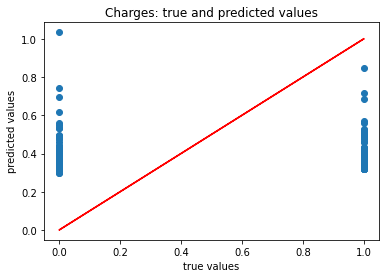

Mean absolute error of the prediction is: 0.4475368955559793
Mean squared error of the prediction is: 0.22039238590931706
Root mean squared error of the prediction is: 0.4694596744229658
Mean absolute percentage error of the prediction is: inf


In [33]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [37]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.67
Accuracy on Test Data  : 0.65


In [38]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)

train_accuracy = log_reg_mnm.score(X_train, y_train)
test_accuracy = log_reg_mnm.score(X_test, y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.66
Accuracy on Test Data  : 0.65


# Now my train and test scores came out as I wanted

In [39]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.666,0.659
1,0.010,0.666,0.654
2,0.100,0.664,0.654
3,1.000,0.662,0.654
4,10.000,0.659,0.654
5,100.000,0.659,0.654
6,1000.000,0.659,0.654


# It looks like C=0.001 is the best option for this model.

# Performance Metrics

In [43]:
from sklearn import datasets

titanic = titanic_df
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

titanic_prediction_model = LogisticRegression()
titanic_prediction_model.fit(X_train, y_train)

train_prediction = titanic_prediction_model.predict(X_train)
test_prediction = titanic_prediction_model.predict(X_test)

test_prediction_probability = titanic_prediction_model.predict_proba(X_test)[:,1]

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[407  29]
 [208  68]]


Confusion Matrix (Test Data)
------------------------------
[[100  13]
 [ 50  16]]


In [45]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 100
True positive amount  : 16
False positive amount : 13
False negative amount : 50


# Accuracy

In [47]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  titanic_prediction_model.score(X_test, y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

Accuracy value by the model   :  0.6480446927374302
Calculated accuracy value     :  0.6480446927374302
accuracy_score() value        :  0.6480446927374302


# Error Rate

In [51]:
print("Error rate value by the model   : ", 1 - titanic_prediction_model.score(X_test, y_test))
print("Calculated error rate     : ", 1 - (TN + TP)/(FN + FP + TN + TP))
print("error_rate_score() value        : ", 1 - accuracy_score(y_test, test_prediction))

Error rate value by the model   :  0.35195530726256985
Calculated error rate     :  0.35195530726256985
error_rate_score() value        :  0.35195530726256985


# Precision

In [55]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

Calculated precision value   :  0.5517241379310345
precision_score() value      :  0.5517241379310345


# Recall

In [52]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

Calculated recall value   :  0.24242424242424243
recall_score() value      :  0.24242424242424243


# Specificity

In [53]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.8849557522123894


In [56]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.33684210526315794
f1_score() value     :  0.33684210526315794


# General View

In [57]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       113
           1       0.55      0.24      0.34        66

    accuracy                           0.65       179
   macro avg       0.61      0.56      0.55       179
weighted avg       0.62      0.65      0.60       179

f1_score() value        : 0.34
recall_score() value    : 0.24
precision_score() value : 0.55


Precision  : [0.66666667 0.55172414]
Recall     : [0.88495575 0.24242424]
F1 Score   : [0.76045627 0.33684211]


# I messed up while predicting the survivors. Fortunately, I can guess better whom died :)

# ROC / AUC

In [61]:
test_prediction_proba = titanic_prediction_model.predict_proba(X_test)[:,1]

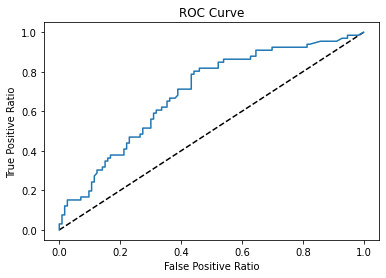

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()


In [63]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

AUC value :  0.6924108340037544


# This AUC score is far better than I expected.

# Precision/Recall Curves

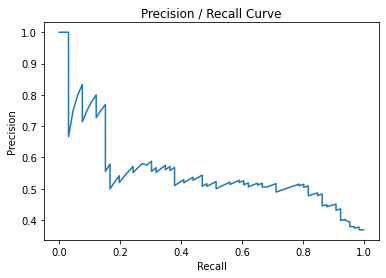

In [64]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

# I made my first mistake at the very beginning, that's not good.

# Logarithmic Loss

In [65]:
from sklearn.metrics import log_loss

print("Logarithmic Loss (log-loss) : " , log_loss(y_test, test_prediction_proba))
print("Error Rate                  : " , 1- accuracy_score(y_test, test_prediction))

Logarithmic Loss (log-loss) :  0.6230488109026635
Error Rate                  :  0.35195530726256985


# My model is pretty good at making a mistake :)
# Anyway, I like my model. The results are better than I've expected.

# Different C values

In [68]:
lr = LogisticRegression(penalty = 'l2', C = 0.001, random_state = 0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='multinomial', random_state=0)

In [69]:
Y = titanic_df['Survived']

X = titanic_df[['age*fare', 'Parch', 'Embarked', 'Fare']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-1.88622862e-05  1.53275069e-02  6.18025050e-02  3.13192177e-03]

Intercept: 
 0.29094274854881813
